In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load both match files
prog_files = {
    'Sent_flat': json.load(open('matches_LLM/matchesHacky.json', 'r')),
    'Sent_upgraded': json.load(open('matches_LLM/SentenceEmbedding.json', 'r')),
    'TransE.5' : json.load(open('matches_LLM/HybridTransE_alpha_0.5.json', 'r')),
    'Distmult.35': json.load(open('matches_LLM/HybridDistmult_alpha_0.35.json', 'r')),
    'Node2vec.65': json.load(open('matches_LLM/HybridNode2vec_alpha_0.65.json', 'r')),
    'NetMf.8' : json.load(open('matches_LLM/HybridNetMf_alpha_0.8.json', 'r')),
    'DeepWalk.8' : json.load(open('matches_LLM/HybridDeepWalk_alpha_0.8.json', 'r')),
}

LLM_files = {
    'Sent_flat': json.load(open('matches/matchesHacky.json', 'r')),
    'Sent_upgraded': json.load(open('matches/SentenceEmbedding.json', 'r')),
    'TransE.65' : json.load(open('matches/HybridTransE_alpha_0.65.json', 'r')),
    'Distmult.5': json.load(open('matches/HybridDistmult_alpha_0.5.json', 'r')),
    'Node2vec.5': json.load(open('matches/HybridNode2vec_alpha_0.5.json', 'r')),
    'NetMf.8' : json.load(open('matches/HybridNetMf_alpha_0.8.json', 'r')),
    'DeepWalk.8' : json.load(open('matches/HybridDeepWalk_alpha_0.8.json', 'r')),    
}

In [6]:
import json
import re
from collections import defaultdict

def get_entity_type(subject_uri):
    # Extracts the entity type after example.org/
    match = re.search(r'example\.org/([^/]+)/', subject_uri)
    return match.group(1) if match else None

def extract_avg_score_per_entity_type(match_list):
    scores = defaultdict(list)
    for match in match_list:
        # Each match contains a pair of entities; take both types (entity1 and entity2)
        for ent_key in ['entity1', 'entity2']:
            # Defensive: skip if missing
            if ent_key in match['entities'][0]:
                subj = match['entities'][0][ent_key]['subject']
                ent_type = get_entity_type(subj)
                if ent_type:
                    scores[ent_type].append(float(match['similarity_score']))
            elif len(match['entities']) > 1 and ent_key in match['entities'][1]:
                subj = match['entities'][1][ent_key]['subject']
                ent_type = get_entity_type(subj)
                if ent_type:
                    scores[ent_type].append(float(match['similarity_score']))
    # Calculate averages
    avg_scores = {etype: sum(vals)/len(vals) for etype, vals in scores.items() if vals}
    return avg_scores

# Load file

avg_scores = extract_avg_score_per_entity_type(LLM_files['Node2vec.5'])
print(avg_scores)


{'Address': 0.775501808617264, 'HealthcareOrg': 0.644673479454858, 'ServiceDept': 0.6609557110272096, 'Person': 0.7246808368692953, 'ContactPoint': 0.8053244301117957}


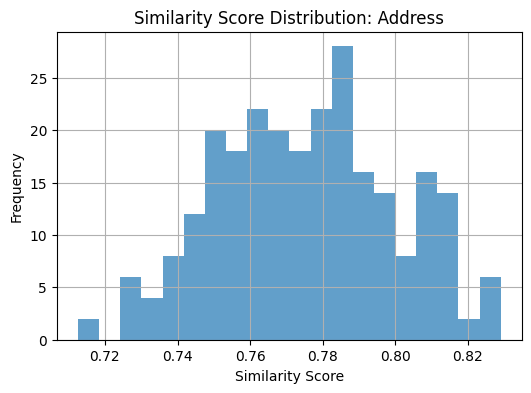

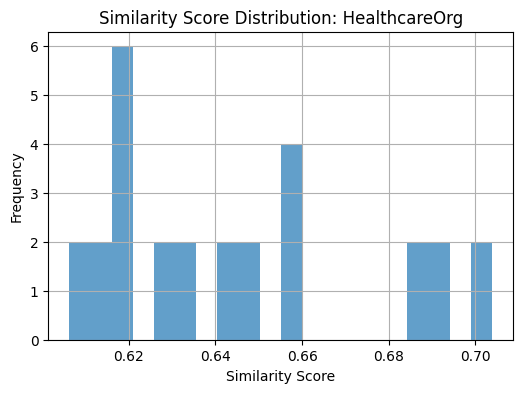

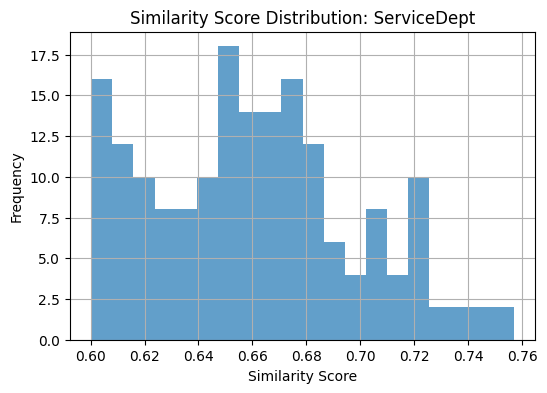

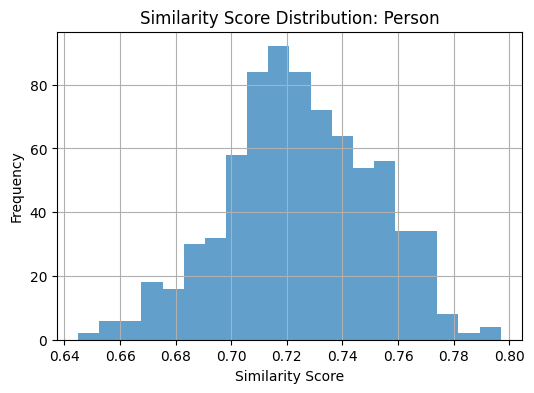

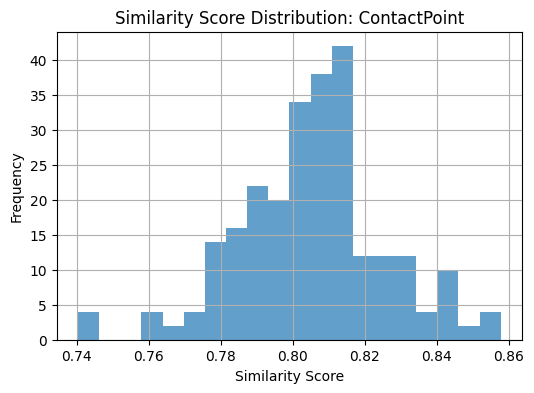

In [7]:
import json
import re
from collections import defaultdict

def get_entity_type(subject_uri):
    match = re.search(r'example\.org/([^/]+)/', subject_uri)
    return match.group(1) if match else None

def scores_per_entity_type(match_list):
    scores = defaultdict(list)
    for match in match_list:
        for ent_key in ['entity1', 'entity2']:
            if ent_key in match['entities'][0]:
                subj = match['entities'][0][ent_key]['subject']
                ent_type = get_entity_type(subj)
                if ent_type:
                    scores[ent_type].append(float(match['similarity_score']))
            elif len(match['entities']) > 1 and ent_key in match['entities'][1]:
                subj = match['entities'][1][ent_key]['subject']
                ent_type = get_entity_type(subj)
                if ent_type:
                    scores[ent_type].append(float(match['similarity_score']))
    return scores



entity_type_scores = scores_per_entity_type(LLM_files['Node2vec.5'])

import matplotlib.pyplot as plt

for etype, scores in entity_type_scores.items():
    plt.figure(figsize=(6,4))
    plt.hist(scores, bins=20, alpha=0.7)
    plt.title(f"Similarity Score Distribution: {etype}")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

